In [8]:
import gensim
import numpy as np

In [28]:
def get_word_embeddings(sentence, model):
    embeddings = np.array([model.word_vec(word) for word in sentence.split() if word in model.wv.vocab.keys()])
    print(embeddings.T.shape)
    return embeddings.T

In [2]:
model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300-SLIM.bin', binary=True)  

In [29]:
get_word_embeddings('This is a test', model)

(300, 3)


C:\Users\antoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


array([[-1.11042269e-01,  3.74602806e-03, -5.35108149e-02],
       [ 7.65291303e-02, -3.89197730e-02, -1.38358446e-02],
       [ 6.15234189e-02,  9.13317278e-02,  5.09452298e-02],
       [ 9.70681943e-03,  1.20002627e-02, -2.32735388e-02],
       [-9.07845572e-02, -7.05745146e-02,  2.98707634e-02],
       [ 3.92024219e-02,  1.05342850e-01,  7.14699226e-03],
       [ 2.55097095e-02,  5.99364489e-02, -3.06037888e-02],
       [-6.33991361e-02, -5.73417954e-02, -4.80131283e-02],
       [ 4.83934209e-02,  3.81413773e-02, -1.10870013e-02],
       [ 8.47822726e-02,  1.10921348e-02,  8.86960104e-02],
       [ 2.11955681e-02, -6.53852150e-02, -4.56307977e-02],
       [-1.10291980e-01, -3.13952826e-02, -8.06327313e-02],
       [-8.25314131e-03,  5.37092835e-02,  4.87461537e-02],
       [ 2.12893542e-02,  5.70823299e-03, -1.01707196e-02],
       [ 6.04917761e-03,  7.62827545e-02, -1.95167866e-02],
       [ 1.12542838e-01,  1.38035461e-01,  8.09992477e-02],
       [ 7.46534169e-02, -1.93301532e-02

In [32]:
import torchvision.models as models
# pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.1-cp36-cp36m-win_amd64.whl
# pip3 install torchvision

In [33]:
model_conv = models.inception_v3(pretrained=True)

In [34]:
for param in model_conv.parameters():
    param.requires_grad = False
model_conv = model_conv.to(device)

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './Data/Flicker8k_Dataset/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, ""),
                                          data_transforms[x])
                  for x in ['train']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train']}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

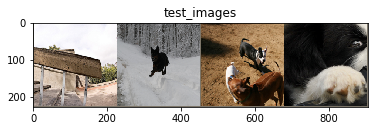

In [2]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title="test_images")

In [3]:
model = models.alexnet(pretrained=True)

# remove last fully-connected layer
new_classifier = nn.Sequential(*list(model.classifier.children())[:-1])
#model.classifier = new_classifier
model = model.to(device)

In [5]:
model(inputs).shape

torch.Size([4, 1000])

In [4]:
for i, (inputs, labels) in enumerate(dataloaders['train']):
    inputs = inputs.to(device)
    print(inputs.shape)
    print(model(inputs))
    break

torch.Size([4, 3, 224, 224])
tensor([[ -7.6863,  -2.8592,   0.6176,  ...,  -4.0098,  -0.4671,   1.5944],
        [  0.5560,   2.2701,   2.0032,  ...,  -1.1910,   3.0634,   2.3579],
        [ -5.4376,  -2.9471,   1.9155,  ...,  -2.0069,  -2.0020,   1.2334],
        [ -0.6199,   1.3532,  -2.5476,  ...,  -6.3895,   4.1280,   4.1996]],
       device='cuda:0', grad_fn=<ThAddmmBackward>)
